# Reading and Visualising Data with Pandas

Tamás Gál (tamas.gal@fau.de)


In [1]:
%matplotlib inline
import pandas as pd

import matplotlib as ml
import sys
plt = ml.pyplot
ml.rcParams['figure.figsize'] = (10.0, 5.0)

print("Python version: {0}\n"
      "Pandas version: {1}\n"
      "Matplotlib version: {2}\n"
     
      .format(sys.version, pd.__version__, ml.__version__))

Python version: 3.7.6 | packaged by conda-forge | (default, Mar  5 2020, 15:03:29) 
[Clang 9.0.1 ]
Pandas version: 1.0.2
Matplotlib version: 3.2.0



In [2]:
from IPython.core.magic import register_line_magic

@register_line_magic
def shorterr(line):
    """Show only the exception message if one is raised."""
    try:
        output = eval(line)
    except Exception as e:
        print("\x1b[31m\x1b[1m{e.__class__.__name__}: {e}\x1b[0m".format(e=e))
    else:
        return output
    
del shorterr

In [3]:
import warnings
warnings.filterwarnings('ignore')  # annoying UserWarnings from Jupyter which are not fixed yet

## Exercise 1

Use the `pd.read_csv()` function to create a `DataFrame` from the dataset `data/neutrinos.csv`.

### Problems encountered

- the first few lines represent a plain header and need to be skipped
- comments are indicated with `$` at the beginning of the line
- the column separator is `:`
- the decimal delimiter is `,`
- the index column is the first one
- there is a footer to be excluded
- footer exclusion only works with the Python-engine

In [30]:
neutrinos = pd.read_csv('data/neutrinos.csv', skiprows=6, delimiter=':', decimal=',', comment ='$', index_col=0, skipfooter=1)

In [31]:
neutrinos.head()

,azimuth,zenith,bjorkeny,energy,pos_x,pos_y,pos_z,proba_track,proba_cscd
0,2.349537,1.116004,0.04899799823760986,3.3664,52.740,28.831,401.186,0.824351,0.175649
1,5.575786,1.742838,0.28047099709510803,3.8900,48.369,29.865,417.282,0.818363,0.181637
2,4.656125,2.686909,0.1198429986834526,3.2335,71.722,121.449,363.077,0.828343,0.171657
3,0.520486,1.939326,0.06131500005722046,4.7840,-47.592,-84.466,350.687,0.842315,0.157685
4,2.856970,1.678897,0.06146499887108803,3.9833,-25.518,24.362,391.891,0.862275,0.137725


### Check the dtypes to make sure everthing is parsed correctly (and is not an `object`-array)

In [34]:
neutrinos.bjorkeny = neutrinos.bjorkeny.str.replace(',', '.').astype(float)

In [35]:
neutrinos.dtypes

azimuth        float64
zenith         float64
bjorkeny       float64
energy         float64
pos_x          float64
pos_y          float64
pos_z          float64
proba_track    float64
proba_cscd     float64
dtype: object

## Exercise 2

Create a histogram of the neutrino energies.

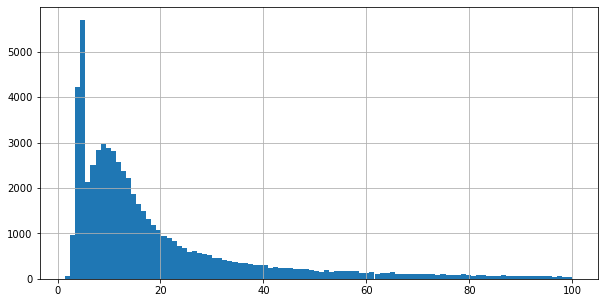

In [36]:
neutrinos.energy.hist(bins=100);

## Exercise 3

Use the `pd.read_csv()` function to create a `DataFrame` from the dataset `data/reco.csv`.

In [37]:
reco = pd.read_csv('data/reco.csv', index_col=0)
reco

,zenith,azimuth,energy_muon,energy_neutrino,bjorken_y,quality,pos_x,pos_y,pos_z
0,1.138133,2.180345,0.291326,1.968828,0.125,-4.354237,48.916672,32.404689,-6.251441
1,1.501718,4.300291,2.247325,3.973614,0.125,-4.853344,59.164913,26.016755,12.737107
2,2.160066,4.228711,1.748958,3.390933,0.125,-3.836176,69.988323,116.081679,-35.060437
3,2.016892,0.621110,6.099985,6.643886,0.625,-4.556744,-48.878254,-86.933884,-57.699791
4,1.944401,3.030613,4.212069,5.967662,0.125,-4.927643,-32.267179,26.163239,-12.441818
...,...,...,...,...,...,...,...,...,...
60973,1.299424,6.236993,4.599036,6.387176,0.125,-3.945290,-18.263625,91.363175,36.575867
60974,0.742736,4.839671,10.505955,12.610675,0.375,-3.999766,-68.484308,-79.099002,-16.943958
60975,1.235372,0.915573,7.150356,9.964440,0.375,-4.068371,-65.527163,58.488387,-27.839264
60976,1.776043,5.992593,8.750033,10.912368,0.375,-4.387784,-45.701547,65.905001,-33.615596


## Exercise 4

Combine the `neutrinos` and `reco` `DataFrames`  using `pd.concat()`

In [40]:
neutrinos

,azimuth,zenith,bjorkeny,energy,pos_x,pos_y,pos_z,proba_track,proba_cscd
0,2.349537,1.116004,0.048998,3.366400,52.740,28.831,401.186,0.824351,0.175649
1,5.575786,1.742838,0.280471,3.890000,48.369,29.865,417.282,0.818363,0.181637
2,4.656125,2.686909,0.119843,3.233500,71.722,121.449,363.077,0.828343,0.171657
3,0.520486,1.939326,0.061315,4.784000,-47.592,-84.466,350.687,0.842315,0.157685
4,2.856970,1.678897,0.061465,3.983300,-25.518,24.362,391.891,0.862275,0.137725
...,...,...,...,...,...,...,...,...,...
60973,6.167531,1.320392,0.093289,6.696500,-25.916,91.493,444.696,0.804391,0.195609
60974,4.933224,0.729290,0.335327,22.188999,-68.489,-78.661,389.067,0.886228,0.113772
60975,1.028631,1.091732,0.325266,14.085000,-66.319,56.084,378.345,0.824351,0.175649
60976,5.993753,1.713249,0.087113,6.198300,-47.727,66.036,372.069,0.976048,0.023952


In [55]:
neutrinos.shape

(60978, 9)

In [56]:
reco.shape

(60978, 9)

In [53]:
df = pd.concat([neutrinos, reco.add_prefix('reco_')], axis=1)

In [54]:
df.shape

(60978, 18)

In [57]:
df

,azimuth,zenith,bjorkeny,energy,pos_x,pos_y,pos_z,proba_track,proba_cscd,reco_zenith,reco_azimuth,reco_energy_muon,reco_energy_neutrino,reco_bjorken_y,reco_quality,reco_pos_x,reco_pos_y,reco_pos_z
0,2.349537,1.116004,0.048998,3.366400,52.740,28.831,401.186,0.824351,0.175649,1.138133,2.180345,0.291326,1.968828,0.125,-4.354237,48.916672,32.404689,-6.251441
1,5.575786,1.742838,0.280471,3.890000,48.369,29.865,417.282,0.818363,0.181637,1.501718,4.300291,2.247325,3.973614,0.125,-4.853344,59.164913,26.016755,12.737107
2,4.656125,2.686909,0.119843,3.233500,71.722,121.449,363.077,0.828343,0.171657,2.160066,4.228711,1.748958,3.390933,0.125,-3.836176,69.988323,116.081679,-35.060437
3,0.520486,1.939326,0.061315,4.784000,-47.592,-84.466,350.687,0.842315,0.157685,2.016892,0.621110,6.099985,6.643886,0.625,-4.556744,-48.878254,-86.933884,-57.699791
4,2.856970,1.678897,0.061465,3.983300,-25.518,24.362,391.891,0.862275,0.137725,1.944401,3.030613,4.212069,5.967662,0.125,-4.927643,-32.267179,26.163239,-12.441818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60973,6.167531,1.320392,0.093289,6.696500,-25.916,91.493,444.696,0.804391,0.195609,1.299424,6.236993,4.599036,6.387176,0.125,-3.945290,-18.263625,91.363175,36.575867
60974,4.933224,0.729290,0.335327,22.188999,-68.489,-78.661,389.067,0.886228,0.113772,0.742736,4.839671,10.505955,12.610675,0.375,-3.999766,-68.484308,-79.099002,-16.943958
60975,1.028631,1.091732,0.325266,14.085000,-66.319,56.084,378.345,0.824351,0.175649,1.235372,0.915573,7.150356,9.964440,0.375,-4.068371,-65.527163,58.488387,-27.839264
60976,5.993753,1.713249,0.087113,6.198300,-47.727,66.036,372.069,0.976048,0.023952,1.776043,5.992593,8.750033,10.912368,0.375,-4.387784,-45.701547,65.905001,-33.615596


### Problems encountered

- need to define the right axis
- identical column names should be avoided

## Exercise 5

Make a scatter plot to visualise the zenith reconstruction quality.



In [59]:
df[['zenith', 'reco_zenith']]

,zenith,reco_zenith
0,1.116004,1.138133
1,1.742838,1.501718
2,2.686909,2.160066
3,1.939326,2.016892
4,1.678897,1.944401
...,...,...
60973,1.320392,1.299424
60974,0.729290,0.742736
60975,1.091732,1.235372
60976,1.713249,1.776043


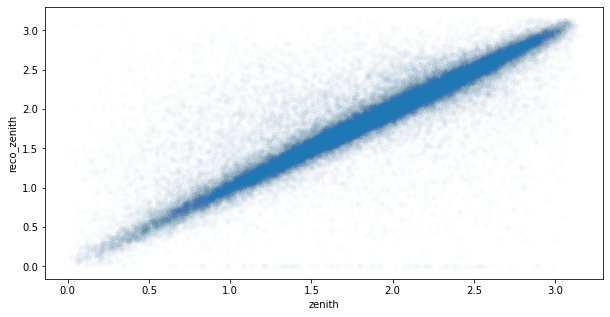

In [62]:
df.plot.scatter(x='zenith', y='reco_zenith',alpha=0.01)

## Exercise 6

Create a histogram of the cascade probabilities (__`neutrinos`__ dataset: `proba_cscd` column) for the energy ranges 1-5 GeV, 5-10 GeV, 10-20 GeV and 20-100 GeV.

In [75]:
df['energy_bin'] = pd.Series(np.nan)

In [86]:
df['energy_bin'][(df.energy <= 5) & (df.energy >= 1)] = 1
df['energy_bin'][(df.energy > 5) & (df.energy <= 10)] = 2
df['energy_bin'][(df.energy > 10) & (df.energy <= 20)] = 3
df['energy_bin'][(df.energy > 20) & (df.energy <= 100)] = 4

In [87]:
df

,azimuth,zenith,bjorkeny,energy,pos_x,pos_y,pos_z,proba_track,proba_cscd,reco_zenith,reco_azimuth,reco_energy_muon,reco_energy_neutrino,reco_bjorken_y,reco_quality,reco_pos_x,reco_pos_y,reco_pos_z,energy_bin
0,2.349537,1.116004,0.048998,3.366400,52.740,28.831,401.186,0.824351,0.175649,1.138133,2.180345,0.291326,1.968828,0.125,-4.354237,48.916672,32.404689,-6.251441,1.0
1,5.575786,1.742838,0.280471,3.890000,48.369,29.865,417.282,0.818363,0.181637,1.501718,4.300291,2.247325,3.973614,0.125,-4.853344,59.164913,26.016755,12.737107,1.0
2,4.656125,2.686909,0.119843,3.233500,71.722,121.449,363.077,0.828343,0.171657,2.160066,4.228711,1.748958,3.390933,0.125,-3.836176,69.988323,116.081679,-35.060437,1.0
3,0.520486,1.939326,0.061315,4.784000,-47.592,-84.466,350.687,0.842315,0.157685,2.016892,0.621110,6.099985,6.643886,0.625,-4.556744,-48.878254,-86.933884,-57.699791,1.0
4,2.856970,1.678897,0.061465,3.983300,-25.518,24.362,391.891,0.862275,0.137725,1.944401,3.030613,4.212069,5.967662,0.125,-4.927643,-32.267179,26.163239,-12.441818,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60973,6.167531,1.320392,0.093289,6.696500,-25.916,91.493,444.696,0.804391,0.195609,1.299424,6.236993,4.599036,6.387176,0.125,-3.945290,-18.263625,91.363175,36.575867,2.0
60974,4.933224,0.729290,0.335327,22.188999,-68.489,-78.661,389.067,0.886228,0.113772,0.742736,4.839671,10.505955,12.610675,0.375,-3.999766,-68.484308,-79.099002,-16.943958,4.0
60975,1.028631,1.091732,0.325266,14.085000,-66.319,56.084,378.345,0.824351,0.175649,1.235372,0.915573,7.150356,9.964440,0.375,-4.068371,-65.527163,58.488387,-27.839264,3.0
60976,5.993753,1.713249,0.087113,6.198300,-47.727,66.036,372.069,0.976048,0.023952,1.776043,5.992593,8.750033,10.912368,0.375,-4.387784,-45.701547,65.905001,-33.615596,2.0


In [99]:
df['energy_bin'] = pd.cut(x=df.energy, bins=[1, 5, 10, 20, 100])
df

,azimuth,zenith,bjorkeny,energy,pos_x,pos_y,pos_z,proba_track,proba_cscd,reco_zenith,reco_azimuth,reco_energy_muon,reco_energy_neutrino,reco_bjorken_y,reco_quality,reco_pos_x,reco_pos_y,reco_pos_z,energy_bin
0,2.349537,1.116004,0.048998,3.366400,52.740,28.831,401.186,0.824351,0.175649,1.138133,2.180345,0.291326,1.968828,0.125,-4.354237,48.916672,32.404689,-6.251441,"(1, 5]"
1,5.575786,1.742838,0.280471,3.890000,48.369,29.865,417.282,0.818363,0.181637,1.501718,4.300291,2.247325,3.973614,0.125,-4.853344,59.164913,26.016755,12.737107,"(1, 5]"
2,4.656125,2.686909,0.119843,3.233500,71.722,121.449,363.077,0.828343,0.171657,2.160066,4.228711,1.748958,3.390933,0.125,-3.836176,69.988323,116.081679,-35.060437,"(1, 5]"
3,0.520486,1.939326,0.061315,4.784000,-47.592,-84.466,350.687,0.842315,0.157685,2.016892,0.621110,6.099985,6.643886,0.625,-4.556744,-48.878254,-86.933884,-57.699791,"(1, 5]"
4,2.856970,1.678897,0.061465,3.983300,-25.518,24.362,391.891,0.862275,0.137725,1.944401,3.030613,4.212069,5.967662,0.125,-4.927643,-32.267179,26.163239,-12.441818,"(1, 5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60973,6.167531,1.320392,0.093289,6.696500,-25.916,91.493,444.696,0.804391,0.195609,1.299424,6.236993,4.599036,6.387176,0.125,-3.945290,-18.263625,91.363175,36.575867,"(5, 10]"
60974,4.933224,0.729290,0.335327,22.188999,-68.489,-78.661,389.067,0.886228,0.113772,0.742736,4.839671,10.505955,12.610675,0.375,-3.999766,-68.484308,-79.099002,-16.943958,"(20, 100]"
60975,1.028631,1.091732,0.325266,14.085000,-66.319,56.084,378.345,0.824351,0.175649,1.235372,0.915573,7.150356,9.964440,0.375,-4.068371,-65.527163,58.488387,-27.839264,"(10, 20]"
60976,5.993753,1.713249,0.087113,6.198300,-47.727,66.036,372.069,0.976048,0.023952,1.776043,5.992593,8.750033,10.912368,0.375,-4.387784,-45.701547,65.905001,-33.615596,"(5, 10]"


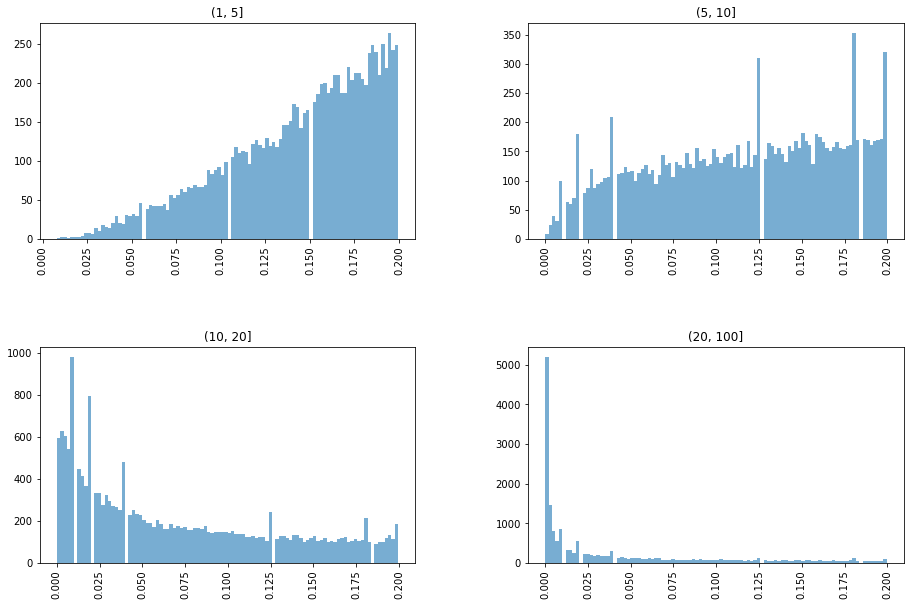

In [100]:
df.hist('proba_cscd', by='energy_bin', bins=100, figsize=(15,10), alpha=0.6);

## Exercise 7

Create a 2D histogram showing the distribution of the `x` and `y` values of the starting positions (`pos_x` and `pos_y`) of the neutrinos. This is basically a 2D plane of the starting positions. using the method hist2d

(-200.0, 200.0, -200.0, 200.0)

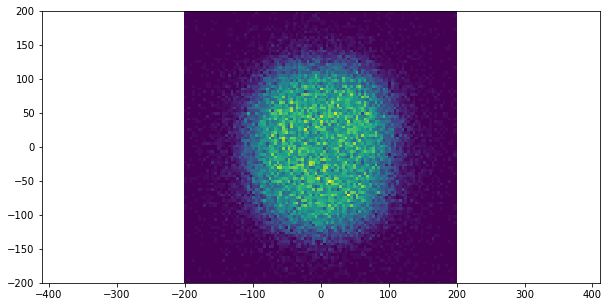

In [103]:
plt.hist2d(df.pos_x, df.pos_y, bins=100, range=((-200,200),(-200,200)));
plt.axis('equal')

(-395.48460082582716, 430.3426008258272, -401.55204999999995, 461.42105)

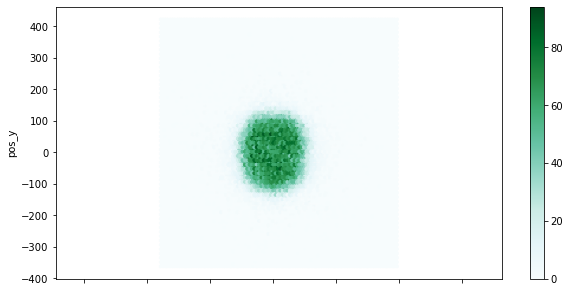

In [109]:
df.plot.hexbin(x='pos_x', y='pos_y',  gridsize=100)
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.axis('equal')

## Acknowledgements
![](images/eu_asterics.png)

This tutorial was supported by the H2020-Astronomy ESFRI and Research Infrastructure Cluster (Grant Agreement number: 653477).